In [1]:
%load_ext autoreload
%autoreload 2

In [36]:
import sys
sys.path.append('../src/')

from utils import DEFAULT_PALETTE
from WADParser import WAD_file
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from utils import EXMY_REGEX, MAPS_ATTRS
import struct
import re
from copy import deepcopy

In [37]:
w = WAD_file('../WADs/DOOM.WAD')

2025-02-18 20:53:28.559 | INFO     | WADParser:__init__:19 - IWAD found at ../WADs/DOOM.WAD
2025-02-18 20:53:28.561 | INFO     | WADParser:_get_palette:91 - Palette extracted.
2025-02-18 20:53:28.566 | INFO     | WADParser:_parse_levels:119 - 36 levels found in this WAD.
2025-02-18 20:53:28.567 | INFO     | WADParser:_parse_by_markers:149 - 107 FLATS found in this WAD.
2025-02-18 20:53:28.568 | INFO     | WADParser:_parse_by_markers:149 - 764 SPRITES found in this WAD.


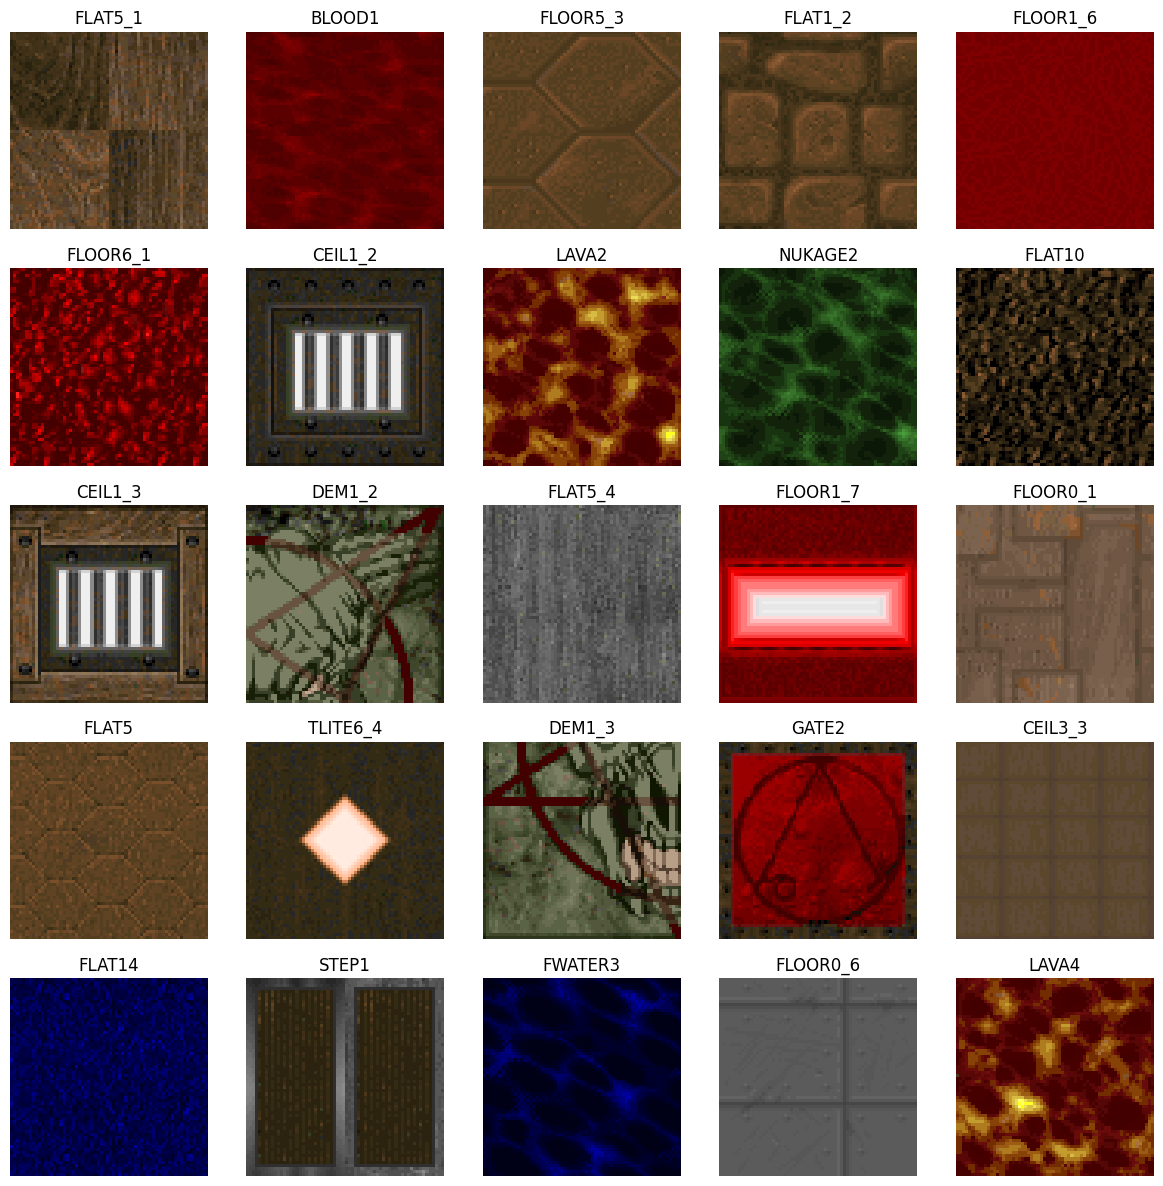

In [38]:
n_flats = 25
fig, ax = plt.subplots(5, 5, figsize=(12, 12))
ax = ax.ravel()

all_flat_names = list(w.flats.keys())
selected_flats = np.random.choice(all_flat_names, size=n_flats, replace=False)

for i, flat_name in enumerate(selected_flats):

    rgb_image = w.draw_flat(*w.flats[flat_name])

    ax[i].imshow(rgb_image / 255, aspect='equal')
    ax[i].set_title(flat_name)
    ax[i].axis('off')

fig.tight_layout(pad=1.2)

In [39]:
img, alpha, _, _ = w._read_patch_data(*w.sprites[sprite_name])

img.shape, alpha.shape

((143, 114), (143, 114))

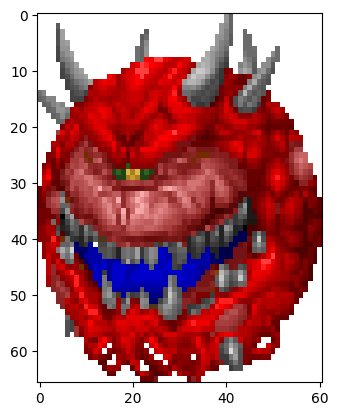

In [31]:
# alpha = alpha.T
alpha = alpha.T[:, :, np.newaxis] * np.ones((1, 1, 4))

rgb_img = w.palette[img.T]
rgba_img = rgb_img * alpha

plt.imshow(rgba_img / 255, aspect=1.2)

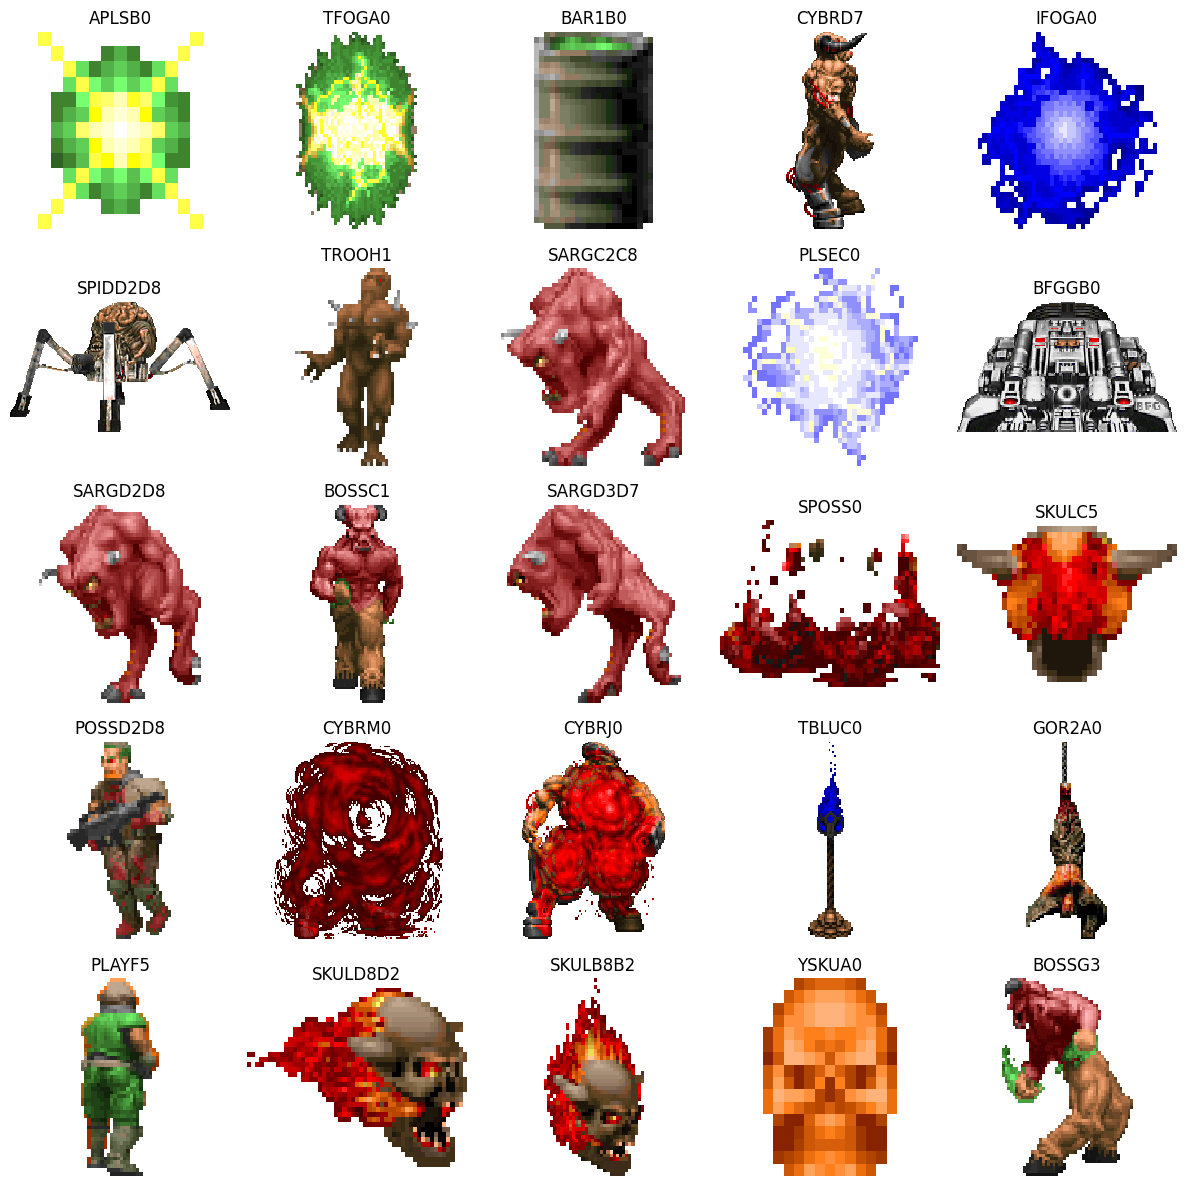

In [40]:
n_sprites = 25
fig, ax = plt.subplots(5, 5, figsize=(12, 12))
ax = ax.ravel()

all_sprite_names = list(w.sprites.keys())
selected_sprites = np.random.choice(all_sprite_names, size=n_sprites, replace=False)

for i, sprite_name in enumerate(selected_sprites):

    rgb_image = w.draw_patch(*w.sprites[sprite_name])

    # Original DOOM had non-square pixels!
    ax[i].imshow(rgb_image / 255, aspect=1.2, interpolation='nearest') 
    ax[i].set_title(sprite_name)
    ax[i].axis('off')

fig.tight_layout(pad=1.2)